In [1]:
import pickle
import numpy as np
import pandas as pd
from IPython.display import  display,Image
import tensorflow as tf

D:\anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Part 1 Read data

In [2]:
df = pd.read_csv("data/df_featured.csv",index_col="index")
df.head()

,date,open,high,low,close,volume,Name,return,vol_change
index,,,,,,,,,
2013-03,2013-03-01,41.18,41.9800,40.73,41.93,3089323,A,0.075125,-0.409335
2013-04,2013-04-01,41.83,41.9771,40.79,40.93,2541331,A,0.024432,0.215632
2013-05,2013-05-01,41.42,41.7400,41.26,41.31,2726213,A,-0.009199,-0.067816
2013-06,2013-06-03,45.65,45.8400,45.04,45.51,3677473,A,-0.092287,-0.258672
2013-07,2013-07-01,43.05,43.7700,42.91,43.59,4283821,A,0.044047,-0.141544


In [3]:
df.shape

(29507, 9)

# Part 2: Recommendation based on "Return" Feature <br>

#### It is easy to understand that we recommend similar stocks to users, but how should we define similar stocks, similar stock could be explain from multiple perspectives, including fundamental aspects, technical aspects, today we will take technical aspects to make recommendation.

## Part 2.1 extract one year stock return as target features

In [4]:
techFeatures = df[['Name',"return"]].groupby("Name").apply(lambda x: x.iloc[-12:,:] if x.shape[0] >= 12 else None)
techFeatures.head()

Name    return
Name index                 
A    2017-03    A -0.053420
     2017-04    A -0.021805
     2017-05    A -0.046595
     2017-06    A -0.081179
     2017-07    A  0.027059

In [8]:
df[['Name',"return"]].groupby("Name").apply(lambda x: x.iloc[-12:,:])

Name    return
Name index                  
A    2017-03     A -0.053420
     2017-04     A -0.021805
     2017-05     A -0.046595
     2017-06     A -0.081179
     2017-07     A  0.027059
     2017-08     A -0.013514
     2017-09     A -0.068966
     2017-10     A -0.007554
     2017-11     A -0.046310
     2017-12     A -0.009754
     2018-01     A  0.016124
     2018-02     A -0.071811
AAL  2017-03   AAL -0.064557
     2017-04   AAL  0.109305
     2017-05   AAL  0.008793
     2017-06   AAL -0.142100
     2017-07   AAL -0.026593
     2017-08   AAL -0.013122
     2017-09   AAL  0.126904
     2017-10   AAL -0.050702
     2017-11   AAL -0.002299
     2017-12   AAL -0.023673
     2018-01   AAL -0.075297
     2018-02   AAL -0.016518
AAP  2017-03   AAP  0.024955
     2017-04   AAP  0.076838
     2017-05   AAP  0.035366
     2017-06   AAP  0.025018
     2017-07   AAP  0.157841
     2017-08   AAP  0.034329
...            ...       ...
ZBH  2017-09   ZBH  0.031488
     2017-10   ZBH -0.028632
     2017-11   ZBH  0.022678
     2017-12   ZBH  0.004539
     2018-01   ZBH -0.076495
     2018-02   ZBH -0.032218
ZION 2017-03  ZION -0.087470
     2017-04  ZION  0.113957
     2017-05  ZION  0.030849
     2017-06  ZION -0.000740
     2017-07  ZION -0.093450
     2017-08  ZION -0.014323
     2017-09  ZION  0.023917
     2017-10  ZION -0.062606
     2017-11  ZION  0.022934
     2017-12  ZION -0.077077
     2018-01  ZION -0.012229
     2018-02  ZION -0.077846
ZTS  2017-03   ZTS  0.026536
     2017-04   ZTS  0.013541
     2017-05   ZTS -0.055259
     2017-06   ZTS -0.101533
     2017-07   ZTS -0.000479
     2017-08   ZTS  0.008854
     2017-09   ZTS -0.011929
     2017-10   ZTS -0.013804
     2017-11   ZTS -0.011781
     2017-12   ZTS -0.107746
     2018-01   ZTS  0.007385
     2018-02   ZTS -0.077744

[6031 rows x 2 columns]

In [9]:
techFeatures = techFeatures.reset_index(drop=True) ### drop index 
techFeatures.head()

,Name,return
0,A,-0.053420
1,A,-0.021805
2,A,-0.046595
3,A,-0.081179
4,A,0.027059


In [10]:
featureSeries = techFeatures.groupby("Name")['return'].apply(np.array)

In [11]:
stocks = featureSeries.index
stocks

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', name='Name', length=500)

In [12]:
### stock feature list
print(f"Shape of feature arr: {featureSeries.values.shape} ")

Shape of feature arr: (500,) 


In [13]:
### 505 unique stocks
uniqueStocks = df.Name.unique().size
print(f"Num of unique stocks: {uniqueStocks}")

Num of unique stocks: 505


In [14]:
print("Five stocks IPO in recent Year, so they are included")

Five stocks IPO in recent Year, so they are included


In [15]:
features = np.stack(featureSeries.values,axis=0)
print(f"Stock features dimension:  {features.shape}")

Stock features dimension:  (500, 12)


## Part 2.2 Generate similarity matrix (cosine similarity)

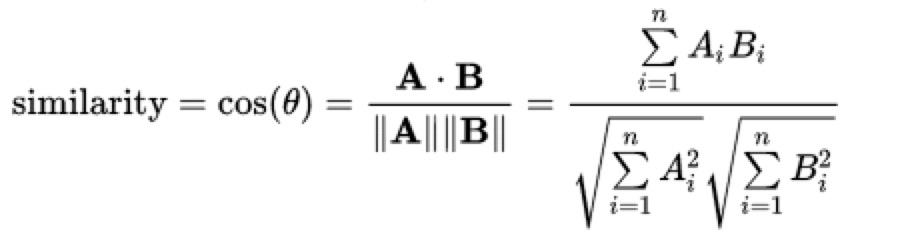

In [16]:
Image("imgs/cosine_similarity.jpg")

#### Matrix formula

A*B = m.T @ m <br>

norm = (m * m).sum(0, keepdims=True) ** .5 <br>

||A|| = norm(m) <br>
||B|| = norm(m.T)

In [17]:
def cosine_similarity_matrix(featureMatrix):
    '''
    calculate cosine similarity for user & item
    
    default: user is in row, item in column
    ''' 
    M,N = featureMatrix.shape
    
    featuresTensor = tf.placeholder(tf.float32, shape = (M, N))

    # normalize each row
    normalized = tf.nn.l2_normalize(featuresTensor, dim = 1)
        
    prod = tf.matmul(normalized, normalized,adjoint_b = True) # transpose second matrix)
                     
    with tf.Session() as sess:
        ans = sess.run(prod,feed_dict={featuresTensor:featureMatrix})

    return ans

In [18]:
similarityMatrix = cosine_similarity_matrix(features)

Instructions for updating:
dim is deprecated, use axis instead


In [19]:
similarityMatrix.shape

(500, 500)

#### Build recommend function

In [20]:
def recommend_to_user(similarityMatrix,productID,top=10):
    ### function: If recommend 10 products based on productID provided, for eg: if user is holding Apple, function will recommend 10 stocks that are similar to apply
    similarityRow = similarityMatrix[productID]
    
    similarityTensor = tf.placeholder(tf.float32,shape=(len(similarityRow),))
    
    top_values, top_indices = tf.nn.top_k(similarityTensor, k=top+1)
    
    with tf.Session() as sess:
        val,idx = sess.run([top_values,top_indices],feed_dict={similarityTensor:similarityRow})
        
    return val[1:],idx[1:] ### avoid itself


In [21]:
recommend_to_user(similarityMatrix,0)

(array([0.9127154 , 0.8666705 , 0.86227864, 0.85794765, 0.8543915 ,
        0.84936297, 0.8259804 , 0.81873626, 0.81311655, 0.81231976],
       dtype=float32),
 array([249,  60, 401, 115, 154, 268, 473, 204, 382, 234]))

# Part 3 Modulize

In [22]:
class recommendor:
    def __init__(self):
        pass
    def train(self,featureMatrix):
        self.similarityMatrix = self.cosine_similarity_matrix(featureMatrix)
    
    def cosine_similarity_matrix(self,featureMatrix):
        '''
        calculate cosine similarity for user & item

        default: user is in row, item in column
        ''' 
        M,N = featureMatrix.shape

        featuresTensor = tf.placeholder(tf.float32, shape = (M, N))

        # normalize each row
        normalized = tf.nn.l2_normalize(featuresTensor, dim = 1)

        prod = tf.matmul(normalized, normalized,adjoint_b = True) # transpose second matrix)

        with tf.Session() as sess:
            ans = sess.run(prod,feed_dict={featuresTensor:featureMatrix})

        return ans
    

    def recommend_to_user(self,productID,top=10,show_detail=True):
        ### function: If recommend 10 products based on productID provided, for eg: if user is holding Apple, function will recommend 10 stocks that are similar to apply
        similarityRow = self.similarityMatrix[productID]

        similarityTensor = tf.placeholder(tf.float32,shape=(len(similarityRow),))

        top_values, top_indices = tf.nn.top_k(similarityTensor, k=top+1)

        with tf.Session() as sess:
            val,idx = sess.run([top_values,top_indices],feed_dict={similarityTensor:similarityRow})

        if show_detail:
            print(f"For productID: {productID} ,similar {top} product are: {idx[1:]}, similarity values {val[1:]}")
        return val[1:],idx[1:] ### avoid itself


In [23]:
myRecommendor = recommendor()

In [24]:
myRecommendor.train(features)

In [25]:
myRecommendor.recommend_to_user(productID=10,top=5,show_detail=True)

For productID: 10 ,similar 5 product are: [ 32 333  96 116 123], similarity values [0.9016582  0.69438416 0.6479789  0.64523196 0.626183  ]


(array([0.9016582 , 0.69438416, 0.6479789 , 0.64523196, 0.626183  ],
       dtype=float32), array([ 32, 333,  96, 116, 123]))